## **Connexion au drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Unzip du Dataset & pré-traitement**

In [ ]:
dataset_name = "voltron"
dataset_destination = "/content/voltron"

!unzip  "/content/drive/MyDrive/voltron/augmented_dataset.zip" -d $dataset_destination
!ls

unzip:  cannot find or open /content/drive/MyDrive/voltron/augmented_dataset.zip, /content/drive/MyDrive/voltron/augmented_dataset.zip.zip or /content/drive/MyDrive/voltron/augmented_dataset.zip.ZIP.
drive  sample_data


In [ ]:
import os
import numpy as np
from numpy import random
import pathlib

# dossier original du dataset
dir_original = "/content/voltron/augmented_dataset"

# dossier final du dataset
dir_processed = "/content/final_dataset"
#os.makedirs(dir_processed)

data_dir = pathlib.Path(dir_original)

set_echs = ['train', 'validation', 'test']
print("set_echs: ", set_echs, "\n")

NOM_CLASSES = np.array([item.name for item in sorted(data_dir.glob('*'))])												
print("class: ", NOM_CLASSES, "\n")

# images par classes
N_IMAGES = np.array([len(list(data_dir.glob(item.name+'/*.jpg'))) for item in sorted(data_dir.glob('*'))])			
print("Nombres d'images pour la classe: ", N_IMAGES, "\n")

# nombre d'images par set (train,validation,test)
N_echs = np.array([(int(np.around(n*60/100)), int(np.around(n*15/100)), int(np.around(n*25/100))) for n in N_IMAGES])	

print("Séparation du dataset: \n ", N_echs, "\n")

set_echs:  ['train', 'validation', 'test'] 

class:  [] 

Nombres d'images pour la classe:  [] 

Séparation du dataset: 
  [] 



In [ ]:
#!rm -r '/content/final_dataset'

## **Tri & Redimiension des images**

In [5]:
# Création du dataset final : Tri & redimension 
from PIL import Image

# tailles des images
size = 1280, 720

for set_tag in set_echs:
	os.makedirs(dir_processed + '/' + set_tag)

	for nom_classe in NOM_CLASSES:
		os.makedirs(dir_processed + '/' + set_tag + '/' + nom_classe)

print("Tri du dataset.")

i=0
j=0
k=0
for nom_classe in NOM_CLASSES:													
	
    print("class name: ", nom_classe)

    compt_echs = 0
    k=0

    array = sorted(os.listdir(dir_original + '/' + nom_classe))
    #random.shuffle(array)

    for nom_image in array:	                                       
	
        print("image: ", i)
        i=i+1

        if compt_echs == N_echs[j][k]:										  
            k+=1
            compt_echs=0


        img=Image.open(dir_original +'/'+nom_classe+'/'+nom_image)
        l,_ = img.size
        l=int(l)
        
        
        if l==1080 or l==720:
        
            transposed = img.transpose(Image.ROTATE_90)
            transposed.thumbnail(size)
            transposed.save(dir_processed+'/'+set_echs[k]+'/'+nom_classe+'/'+nom_image)
        
        else:
        
            img.thumbnail(size)
            img.save(dir_processed+'/'+set_echs[k]+'/'+nom_classe+'/'+nom_image)

        compt_echs+=1	

    j+=1


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
image:  3774
image:  3775
image:  3776
image:  3777
image:  3778
image:  3779
image:  3780
image:  3781
image:  3782
image:  3783
image:  3784
image:  3785
image:  3786
image:  3787
image:  3788
image:  3789
image:  3790
image:  3791
image:  3792
image:  3793
image:  3794
image:  3795
image:  3796
image:  3797
image:  3798
image:  3799
image:  3800
image:  3801
image:  3802
image:  3803
image:  3804
image:  3805
image:  3806
image:  3807
image:  3808
image:  3809
image:  3810
image:  3811
image:  3812
image:  3813
image:  3814
image:  3815
image:  3816
image:  3817
image:  3818
image:  3819
image:  3820
image:  3821
image:  3822
image:  3823
image:  3824
image:  3825
image:  3826
image:  3827
image:  3828
image:  3829
image:  3830
image:  3831
image:  3832
image:  3833
image:  3834
image:  3835
image:  3836
image:  3837
image:  3838
image:  3839
image:  3840
image:  3841
image:  3842
image:  3843
image:  3844

## **Paramètres**

In [6]:
import os

PATH_DATASET = '/content/final_dataset'
PATH_MODELS = '/content/drive/MyDrive/voltron'
 
train_data_dir = os.path.join(PATH_DATASET, 'train')
validation_data_dir = os.path.join(PATH_DATASET, 'validation')
test_data_dir = os.path.join(PATH_DATASET, 'test')

nom_model = os.path.join(PATH_MODELS, 'model_voltron')

batch_size = 32
 
nb_train_echs = 14868
nb_validation_echs = 3717
nb_test_echs = 6195
 
n_class = 2
 
epochs = 30

## **Modèle**

(320, 180, 3)
/content/final_dataset/train
Found 5264 files belonging to 2 classes.
Found 1316 files belonging to 2 classes.
Found 2193 files belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 320, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 320, 180, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 160, 90, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 90, 32)       9248      
_________________________________________________________________
activation_1 (Activation)    (None, 160, 90, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPo

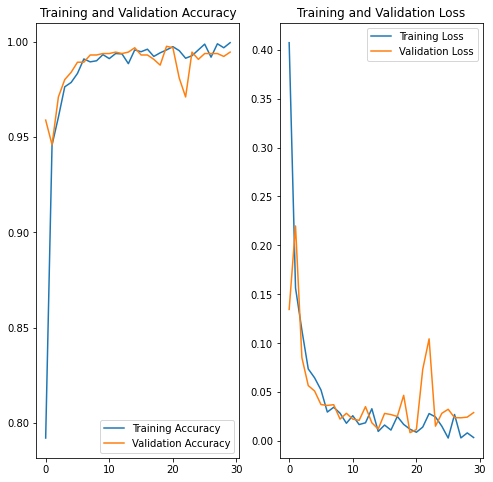

69/69 [==============================] - 8s 108ms/step - loss: 0.0556 - accuracy: 0.9863


TypeError: ignored

In [7]:
import time
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

start = time.time()

img_width, img_height = 320, 180

if keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

print(input_shape)
print(train_data_dir)

train_dataset = image_dataset_from_directory(train_data_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=(img_width, img_height),
                                             label_mode='categorical')


validation_dataset = image_dataset_from_directory(validation_data_dir,
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  image_size=(img_width, img_height),
                                                  label_mode='categorical')


test_dataset = image_dataset_from_directory(test_data_dir,
                                            shuffle=True,
                                            batch_size=batch_size,
                                            image_size=(img_width, img_height),
                                            label_mode='categorical')




# Redimension des imgs
train_dataset = train_dataset.map(lambda images, labels: (images/255, labels))
validation_dataset = validation_dataset.map(lambda images, labels: (images/255, labels))
test_dataset = test_dataset.map(lambda images, labels: (images/255, labels))


#Construction du modèle
m = Sequential()
m.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2, 2)))

m.add(Conv2D(32, (3, 3), padding='same'))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2, 2)))

m.add(Conv2D(64, (3, 3), padding='same'))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2, 2)))

m.add(Conv2D(64, (3, 3), padding='same'))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2, 2)))

m.add(Conv2D(32, (3, 3), padding='same'))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2, 2)))

m.add(Flatten())
m.add(Dense(64))
m.add(Activation('relu'))
m.add(Dropout(0.5))
m.add(Dense(2)) # => 2 classes
m.add(Activation('softmax'))

m.summary()

#compilation du modèle
m.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

#entrainement
with tf.device('/device:GPU:0'):

  history = m.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset)
  
#sauvegarde du modèle
m.save(nom_model)

################################################
##### Graphique de l'efficacité du modèle ##### 
################################################

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


with tf.device('/device:GPU:0'):

  test_result = m.evaluate(test_dataset)
  evaluations = test_result.copy()
  evaluations[evaluations <= 0.5] = 0
  evaluations[evaluations > 0.5] = 1


print("tailles des images: ", img_width,"x",img_height)
print('The testing accuracy is :',test_result[1]*100, '%')
print("résulats du test: ", test_result)


print('Temps d execution du modèle {} sec\n'.format(time.time() - start))

#########################################################
#########################################################

preds = m.predict(test_dataset,verbose=1)

predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
m = pd.DataFrame(data=confusion_matrix(evaluations, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Esca"],
columns=["Predicted Normal", "Predicted Esca"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")


## **Test pour faire des prédictions sur une image**

In [ ]:
import tensorflow as tf 
from keras.models import load_model
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

# dimensions 
img_width, img_height = 320, 180

# chargement du modèle
model = tf.keras.models.load_model('/content/drive/MyDrive/voltron/model_voltron.h5')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# préidiction sur l'image
img_path = '/content/drive/MyDrive/voltron/basf_tessior_vigne_850x478.jpg'

img_overview = cv2.imread(img_path)
cv2_imshow(img_overview)
img = image.load_img(img_path, target_size=(img_width, img_height))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes)

classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
print(classes)
print(classes[0])